
### POSTTEST 5

#### Nama : Mochammad Hollan Ardinata Saragih
#### NIM : 2109106103

Import Library Dan Dataset

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score
df = pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### Supervised Learning

##### Support Vector Classifier

In [69]:
# Pisahkan fitur (X) dan label (y)
X = df[['age', 'bmi']] 
y = df['blood_glucose_level'] 

# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model SVC
svc = SVC()

# Latih model SVC pada data pelatihan
svc.fit(X_train, y_train)

SVC()

Lakukan prediksi dengan SVC pada data pengujian

In [70]:
y_pred_svc = svc.predict(X_test)

In [72]:
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

In [73]:
class_report_svc = classification_report(y_test, y_pred_svc)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Tampilkan hasil evaluasi dengan SVC

Confusion Matrix

In [74]:
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

Visualisasi

Text(0.5, 1.0, 'Confusion Matrix (SVC)')

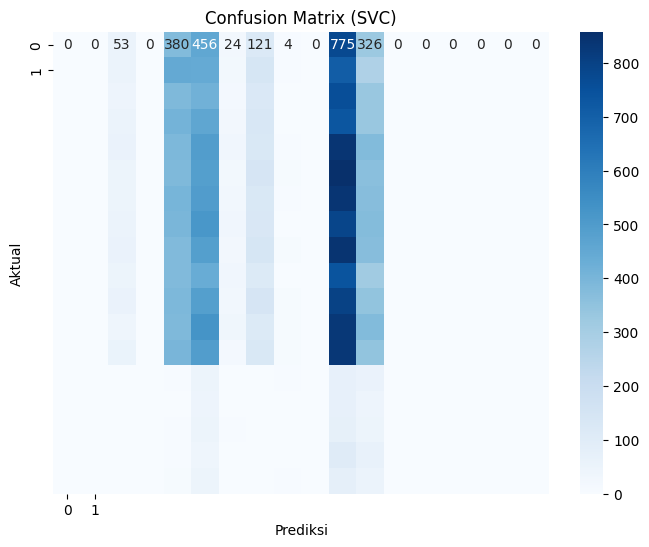

In [75]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (SVC)')

Classification Report

In [76]:
class_report_svc = classification_report(y_test, y_pred_svc)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Visualisasi


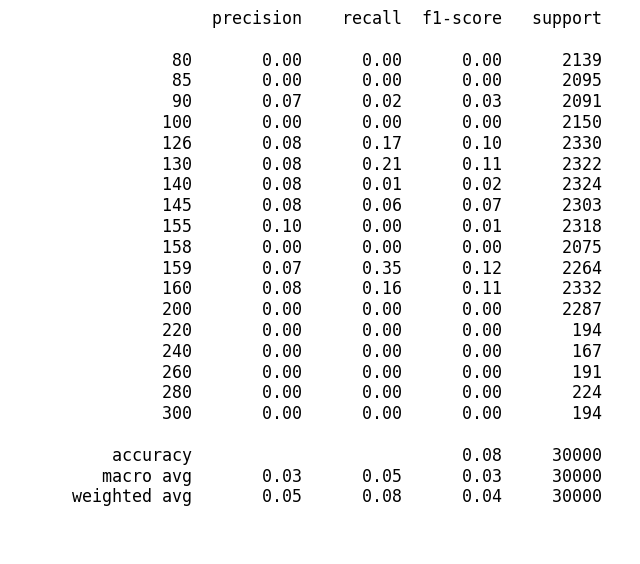

In [77]:
plt.figure(figsize=(8, 4))
plt.text(0.1, 0.1, class_report_svc, {'fontsize': 12}, fontproperties='monospace')
plt.axis('off')

plt.show()

Plot Hasil Prediksi dan Target Asli dengan SVC

Visualisasi Data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


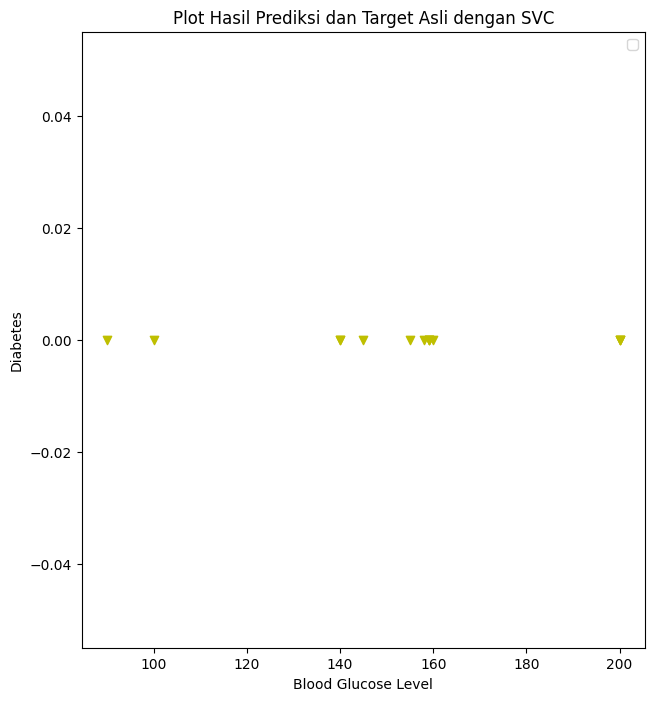

In [96]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

# Menggunakan DataFrame df untuk mengambil data asli termasuk kolom 'App'
# Titik-titik hasil prediksi SVC dengan warna berbeda (hijau untuk benar, merah untuk salah)
# Prediksi <=50K (SVC)
plt.scatter(df.loc[X_test.index, 'blood_glucose_level'][y_pred == 0], df.loc[X_test.index, 'diabetes'][y_pred == 0], c='r', marker='x')

# Prediksi >50K (SVC)
plt.scatter(df.loc[X_test.index, 'blood_glucose_level'][y_pred == 1], df.loc[X_test.index, 'diabetes'][y_pred == 1], c='g', marker='o')

# Titik-titik target asli dengan warna berbeda (biru untuk <=50K, kuning untuk >50K)
# Target <=50K
plt.scatter(df.loc[X_test.index, 'blood_glucose_level'][y_test == 0], df.loc[X_test.index, 'diabetes'][y_test == 0], c='b', marker='^')

# Target >50K
plt.scatter(df.loc[X_test.index, 'blood_glucose_level'][y_test == 1], df.loc[X_test.index, 'diabetes'][y_test == 1], c='y', marker='v')

plt.xlabel('Blood Glucose Level')
plt.ylabel('Diabetes')
plt.title('Plot Hasil Prediksi dan Target Asli dengan SVC')
plt.legend(loc='best')
plt.show()

##### Linear Regression

Pilih fitur dan label

In [97]:
X = df[['bmi','diabetes']]

Gunakan 'age' sebagai label

In [98]:
y = df['age'] 

Bagi dataset menjadi data latih dan data uji

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Membangun model Linear Regression

In [100]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Melakukan prediksi

In [101]:
y_pred = model.predict(X_test)

Menghitung MAE, MSE, RMSE, dan R2-Score

In [102]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse ** 0.5)  
r2 = r2_score(y_test, y_pred)

Tampilkan hasil

In [103]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2-Score:", r2)

MAE: 17.564504874222564
MSE: 436.0006243936168
RMSE: 20.88062796933121
R2-Score: 0.14557340453533973


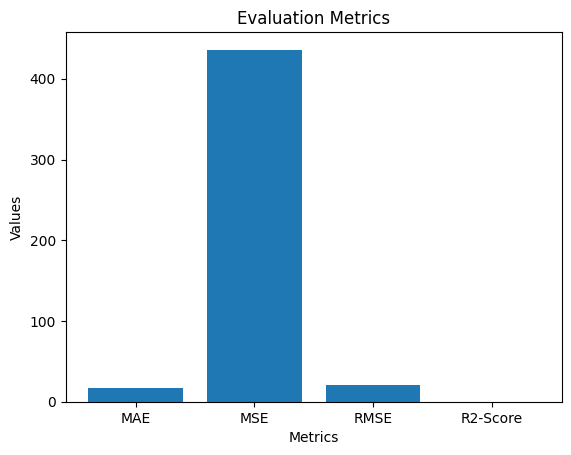

In [104]:
# Data metrik
metrics = ["MAE", "MSE", "RMSE", "R2-Score"]
values = [mae, mse, rmse, r2]

# Plot bar untuk menampilkan metrik
plt.bar(metrics, values)
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Evaluation Metrics")
plt.show()

Plot Hasil Prediksi dan Target Asli

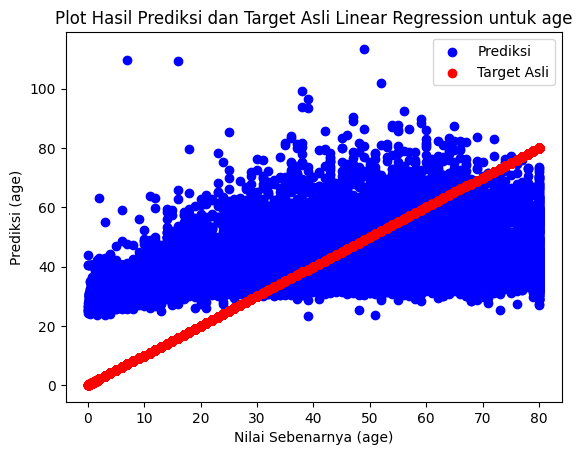

In [105]:
plt.scatter(y_test, y_pred, c='blue', label='Prediksi')
plt.scatter(y_test, y_test, c='red', label='Target Asli')
plt.xlabel("Nilai Sebenarnya (age)")
plt.ylabel("Prediksi (age)")
plt.title("Plot Hasil Prediksi dan Target Asli Linear Regression untuk age")
plt.legend()
plt.show()

#### Unsupervised Learning

##### Implementasi Metode K-Means:

Menggunakan kolom age (kolom ke-0) dan educational-num (kolom ke-4)

In [114]:
X = df.iloc[:, [0, 4]].values 

Inisialisasi list untuk menyimpan nilai WCSS tiap kelompok

In [115]:
wcss = []  

Buat loop untuk melatih algoritma K-Means dengan berbagai jumlah kluster (K)

In [126]:
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

Buat grafik Elbow Method

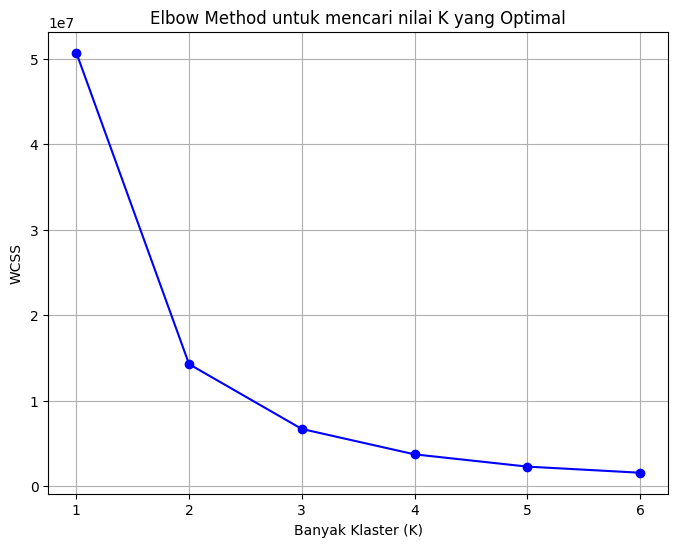

In [127]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Inisialisasi model K-Means dengan nilai K yang sesuai

In [128]:
k = 3 
kmeans = KMeans(k, n_init=10)

In [129]:
X = df[["age", "diabetes"]]

Fit model K-Means pada dataset

In [130]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

Prediksi cluster untuk setiap data point dalam dataset

In [131]:
predicted_clusters = kmeans.predict(X)

Tambahkan kolom "cluster" ke dataset


In [132]:
df["cluster"] = predicted_clusters

##### Evaluasi Cluster yang telah diprediksi

Unlabeled Dataset (Dataset Tanpa Label)

In [133]:
ss_score = silhouette_score(X, predicted_clusters)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, predicted_clusters)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, predicted_clusters)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.56
Davies-Bouldin Index: 0.53
Calinski-Harabasz Index: 330760.40


Labeled Dataset (Dataset Dengan Label)

In [134]:
true_labels = df['blood_glucose_level']

In [135]:
cross_tab = pd.crosstab(predicted_clusters, true_labels)
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
blood_glucose_level   80    85    90    100   126   130   140   145   155  \
row_0                                                                       
0                    1905  1844  1951  1971  2338  2388  2378  2343  2300   
1                    2483  2446  2502  2384  2523  2543  2515  2553  2484   
2                    2718  2611  2659  2670  2841  2863  2839  2783  2791   

blood_glucose_level   158   159   160   200  220  240  260  280  300  
row_0                                                                 
0                    1908  2384  2441  2342  429  445  445  498  448  
1                    2449  2493  2499  2463   18   18   14   24   24  
2                    2669  2882  2772  2795  156  173  176  207  202   



Adjusted Rand Index (ARI)

In [136]:
ari = adjusted_rand_score(true_labels, predicted_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.00


Normalized Mutual Information (NMI)

In [145]:
nmi_age = normalized_mutual_info_score(df['age'], predicted_clusters)
nmi_educational_num = normalized_mutual_info_score(df['diabetes'], predicted_clusters)

print(f"Normalized Mutual Information (NMI) for Age: {nmi_age:.2f}")
print(f"Normalized Mutual Information (NMI) for Educational Num: {nmi_educational_num:.2f}")

Normalized Mutual Information (NMI) for Age: 0.40
Normalized Mutual Information (NMI) for Educational Num: 0.05


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Fungsi HCV-M

In [143]:

homogeneity = homogeneity_score(true_labels, predicted_clusters)
completeness = completeness_score(true_labels, predicted_clusters)
v_measure = v_measure_score(true_labels, predicted_clusters)

print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

TypeError: agg function failed [how->mean,dtype->object]

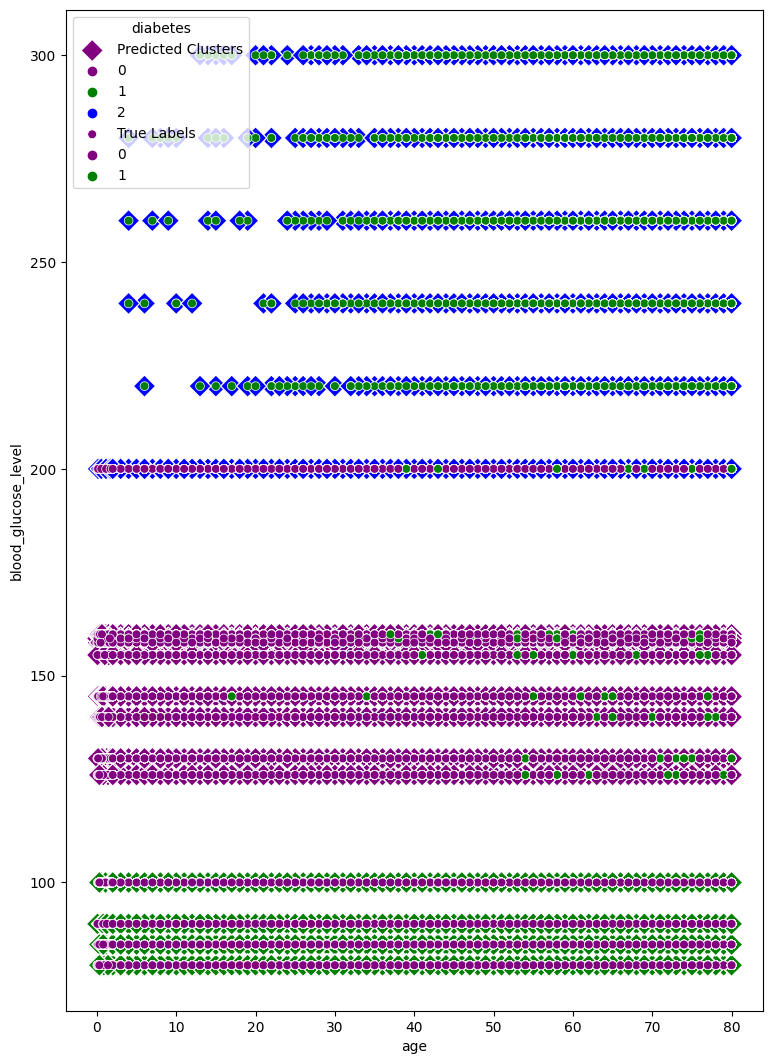

In [154]:
plt.figure(figsize=(9, 13))
colors = ["purple", "green", "blue"]

# Scatter plot hasil prediksi clustering
sns.scatterplot(data=df, x="age", y="blood_glucose_level", palette=colors,
                hue="cluster_mapped", marker="D", s=130, label="Predicted Clusters")

# Scatter plot target asli
sns.scatterplot(data=df, x="age", y="blood_glucose_level", palette=colors,
                hue="diabetes", marker="o", s=40, label="True Labels")

# Tambahkan titik pusat cluster
cluster_centers = df.groupby("cluster_mapped").mean()
sns.scatterplot(data=cluster_centers, x=cluster_centers["age"], y=cluster_centers["blood_glucose_level"],
                palette=colors, hue=cluster_centers.index, marker="*", s=200, label="Cluster Centers")

plt.title("K-Means Clustering (K=3) with True Labels and Cluster Centers")
plt.xlabel("Age")
plt.ylabel("blood_glucose_level")
plt.legend(title="Legend", loc="upper right")
plt.show()
